# PYTHON CODE SAMPLE PART 5 - COMPARING MULTIPLE MACHINE LEARNING ALGORITHMS

In this part I will be comparing several ML algorithms on 80/20 training/test split ratio of EGFR inhibitors dataset.

#### lazypredict is needed

In [ ]:
#! pip install lazypredict

#### Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import lazypredict
from lazypredict.Supervised import LazyRegressor

#### Load data

In [ ]:
#! wget https://raw.githubusercontent.com/Baksic-Ivan/Python_template-Computational_Drug_Discovery/main/EGFR_bioactivity_data_pIC50_fp.csv

In [2]:
df = pd.read_csv('EGFR_bioactivity_data_pIC50_fp.csv')
df = shuffle(df, random_state=24)
X = df.drop('pIC50', axis=1)
Y = df.pIC50

#### Removing low variance features and splitting the data

In [3]:
X.shape

(9018, 881)

In [4]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(9018, 148)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

#### Multiple ML algorithms building

In [8]:
# I removed QuantileRegressor algorithm because it was taking a long time to train it.
lazypredict.Supervised.REGRESSORS.pop(31)

('QuantileRegressor', sklearn.linear_model._quantile.QuantileRegressor)

In [11]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 41/41 [01:15<00:00,  1.83s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 41/41 [00:55<00:00,  1.36s/it]


In [12]:
# performance table of training set
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.92,0.92,0.41,0.18
ExtraTreeRegressor,0.92,0.92,0.41,0.15
ExtraTreesRegressor,0.92,0.92,0.41,9.68
GaussianProcessRegressor,0.92,0.92,0.41,15.85
RandomForestRegressor,0.85,0.86,0.56,6.39
BaggingRegressor,0.83,0.83,0.61,0.79
XGBRegressor,0.75,0.76,0.73,0.80
MLPRegressor,0.72,0.73,0.77,6.48
KNeighborsRegressor,0.54,0.55,0.99,0.18


In [13]:
# performance table of test set
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.30,0.36,1.19,0.69
RandomForestRegressor,0.30,0.35,1.19,6.17
LGBMRegressor,0.28,0.34,1.20,0.16
XGBRegressor,0.28,0.34,1.21,0.67
NuSVR,0.27,0.33,1.21,4.38
SVR,0.26,0.32,1.22,6.01
BaggingRegressor,0.23,0.30,1.24,0.73
KNeighborsRegressor,0.23,0.29,1.25,0.07
GradientBoostingRegressor,0.20,0.27,1.27,2.25


#### Data visualization of test set

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def performance_plot(data_frame, column, upper_x_limit, verbose = False):
    plt.figure(figsize=(5, 10))
    sns.set_theme(style='whitegrid')
    ax = sns.barplot(y=data_frame.index, x=column, data=data_frame)
    ax.set(xlim=(0, upper_x_limit))

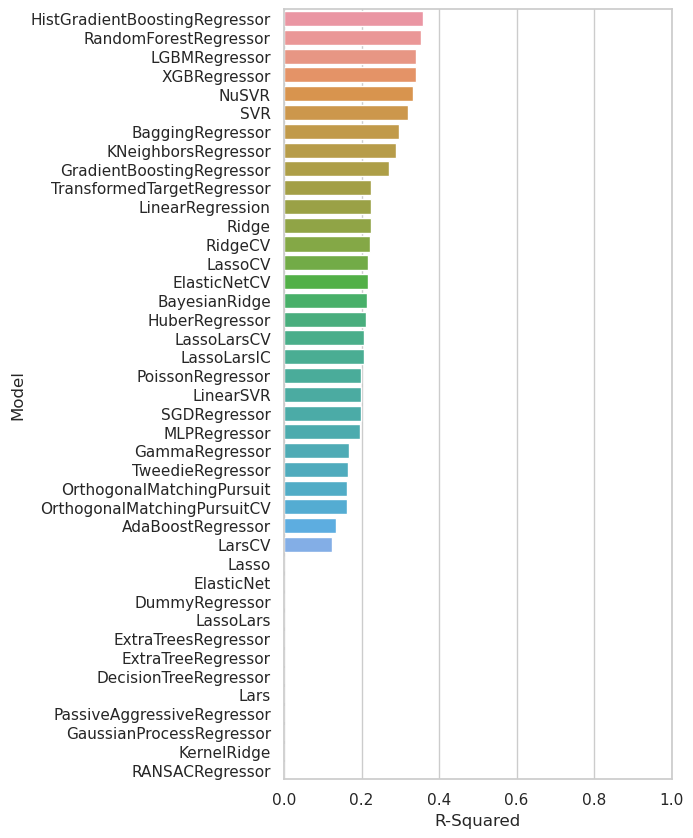

In [24]:
performance_plot(predictions_test, 'R-Squared', 1)

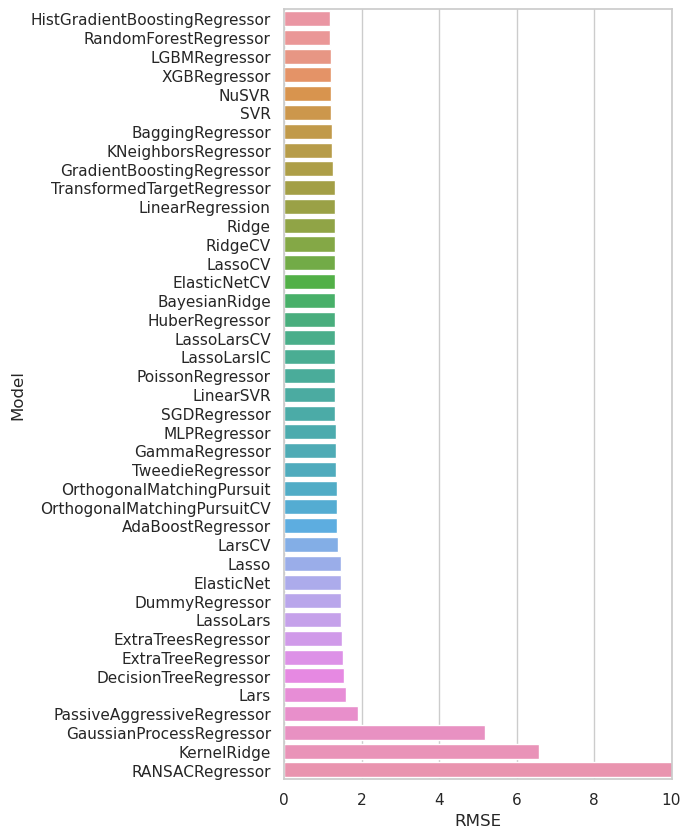

In [25]:
performance_plot(predictions_test, 'RMSE', 10)

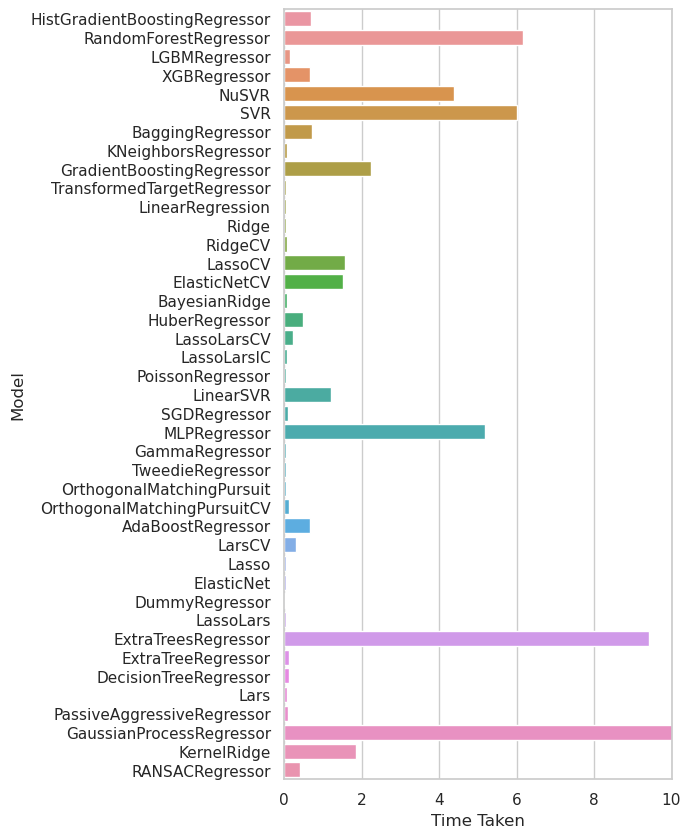

In [26]:
performance_plot(predictions_test, 'Time Taken', 10)

#### Results interpretation

RandomForrestRegressor has one of the best performances based on R-Squared and RMSE resuts, only outperformed by HistGradientBoostingRegressor. Addionaly, RandomForrestRegressor takes considerably more computational time when compared to HistGradientBoostingRegressor.